In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
with open('particle_data_run0.csv', 'r') as f:
    lines = [line.replace('\\t', '\t').strip() for line in f]

# Write cleaned lines to a temporary CSV file
with open('cleaned_data.csv', 'w') as f:
    for line in lines:
        f.write(line + '\n')

# Load into pandas
df = pd.read_csv('cleaned_data.csv', sep='\t')

In [19]:
df

,ParticleType,PosX_mm,PosY_mm,PosZ_mm
0,pi+,3.740610,-1.478870,165.365000
1,pi+,9.190830,-1.451830,234.427000
2,pi+,10.439400,-0.833016,251.262000
3,pi+,11.413700,0.951643,262.826000
4,pi+,11.475800,1.055590,263.875000
...,...,...,...,...
6583,pi0,0.130412,-0.240018,0.251378
6584,pi0,0.130396,-0.239956,0.251438
6585,pi0,0.130427,-0.239973,0.251437
6586,pi0,0.130559,-0.240016,0.251690


In [20]:
df['PosX_mm'] = df['PosX_mm'].astype(float)
df['PosY_mm'] = df['PosY_mm'].astype(float)
df['PosZ_mm'] = df['PosZ_mm'].astype(float)

In [21]:
particle_types = df['ParticleType']
positions = df[['PosX_mm', 'PosY_mm', 'PosZ_mm']]

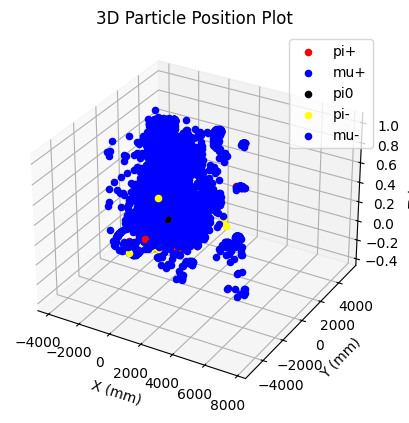

In [22]:

# Step 3: Define color map
color_map = {
    'pi+': 'red',
    'pi-': 'yellow',
    'mu+': 'blue',
    'mu-': 'blue'
}

# Step 4: Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point with the correct color
for _, row in df.iterrows():
    ax.scatter(row['PosX_mm'], row['PosY_mm'], row['PosZ_mm'],
               color=color_map.get(row['ParticleType'], 'black'),
               label=row['ParticleType'])

# Avoid duplicate legends
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys())

# Labels
ax.set_xlabel("X (mm)")
ax.set_ylabel("Y (mm)")
ax.set_zlabel("Z (mm)")
ax.set_title("3D Particle Position Plot")

plt.show()